In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os 
import matplotlib.pyplot as plt

os.getcwd()

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part3'

### Data = True Signal + Error

In [2]:
customer_entries = pd.read_excel('data/ch11/CustomerEnteries.xlsx')

customer_entries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         495 non-null    datetime64[ns]
 1   Time         495 non-null    int64         
 2   N_Customers  495 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 11.7 KB


In [3]:
BM = customer_entries.Time == 9
asd = customer_entries.drop(columns='Date')[BM].values

<AxesSubplot:>

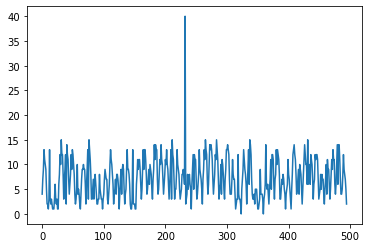

In [4]:
customer_entries.N_Customers.plot()

### Regarding the data entry as a missing value and replacing it with np.nan

In [5]:
err_index = customer_entries[customer_entries.N_Customers > 20].index
customer_entries.loc[err_index] = np.nan

### Univariate

<AxesSubplot:>

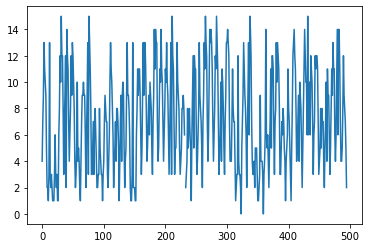

In [6]:
customer_entries.N_Customers.plot()

### bivariate

<AxesSubplot:xlabel='Time', ylabel='N_Customers'>

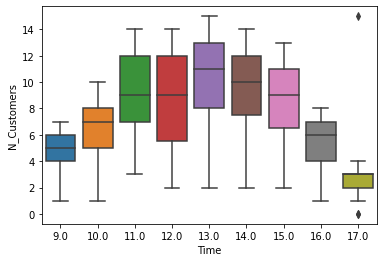

In [7]:
sns.boxplot(y='N_Customers', x='Time', data=customer_entries)

<AxesSubplot:xlabel='Time'>

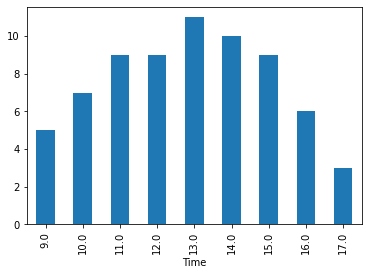

In [8]:
customer_entries.groupby('Time').N_Customers.median().plot.bar()

### Exercise_1

In [9]:
temp_df = pd.read_csv('data/ch11/Temperature_data.csv')
temp_df.head(1)

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P


In [10]:
temp_df.columns = ['site','species','date','value','units','P_or_R']

In [11]:
for col in temp_df.columns :
    print('{} : {} _ {}'.format(col,len(temp_df[col].unique()),sum(temp_df[col].isna())))
    

site : 1 _ 0
species : 1 _ 0
date : 365 _ 0
value : 28 _ 14
units : 1 _ 0
P_or_R : 1 _ 0


In [12]:
new_temp_df = temp_df[['date','value']]


In [13]:
new_temp_df.loc[:,'date'] = pd.to_datetime(new_temp_df['date'])

<ipython-input-13-7c1e367b6e0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_temp_df.loc[:,'date'] = pd.to_datetime(new_temp_df['date'])


In [14]:
new_temp_df['month'] = new_temp_df['date'].dt.month
new_temp_df['day'] = new_temp_df['date'].dt.day

<ipython-input-14-1d0b8b9cd9a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_temp_df['month'] = new_temp_df['date'].dt.month
<ipython-input-14-1d0b8b9cd9a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_temp_df['day'] = new_temp_df['date'].dt.day


<AxesSubplot:xlabel='date'>

<Figure size 720x288 with 0 Axes>

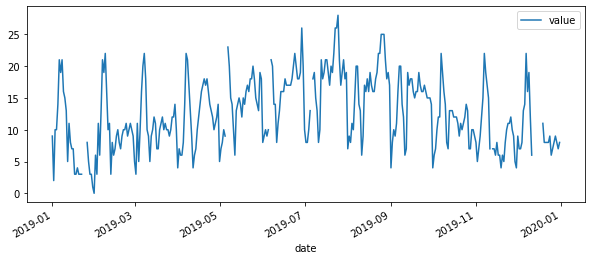

In [15]:
plt.figure(figsize=(10,4))
new_temp_df.plot(x='date', y='value', figsize=(10,4))

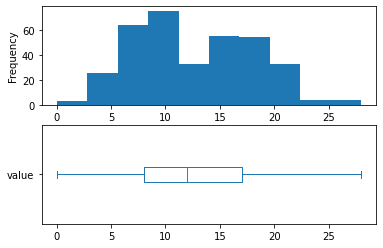

In [16]:
plt.subplot(2,1,1)
new_temp_df.value.plot.hist()
plt.subplot(2,1,2)
new_temp_df.value.plot.box(vert=False)

plt.show()

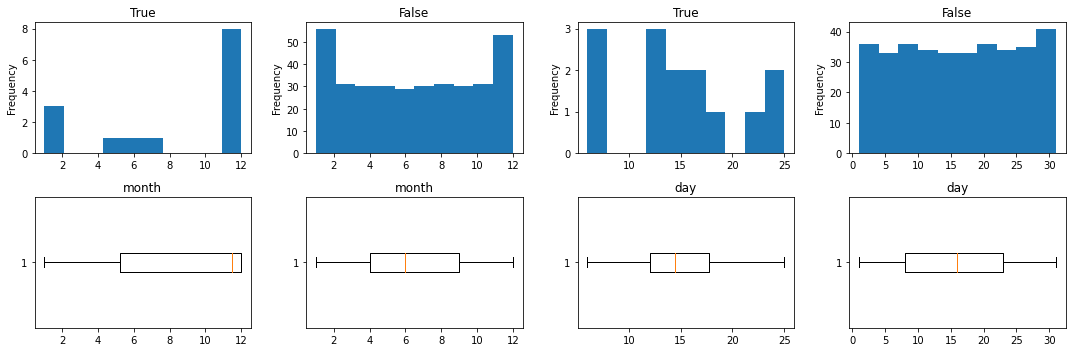

In [17]:
plt.figure(figsize=(15,5))
for k, val in enumerate(['month', 'day']) :
    for i, poss in enumerate([True,False]) :    
        BM = new_temp_df['value'].isna() == poss
        plt.subplot(2,4,i+1+2*k)
        plt.title(poss)
        plt.hist(new_temp_df[BM][val])
        plt.ylabel('Frequency')
        plt.subplot(2,4,i+5+2*k)
        plt.title(val)
        plt.boxplot(new_temp_df[BM][val], vert=False)
plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import ttest_ind
BM = new_temp_df['value'].isna()
ttest_ind(new_temp_df[BM].month, new_temp_df[~BM].month)

Ttest_indResult(statistic=1.9521738591840396, pvalue=0.05168601534282252)

In [19]:
new_temp_df[new_temp_df['value'].isna() == True]

,date,value,month,day
22,2019-01-23,NaN,1,23
23,2019-01-24,NaN,1,24
24,2019-01-25,NaN,1,25
155,2019-05-06,NaN,5,6
156,2019-06-06,NaN,6,6
157,2019-07-06,NaN,7,6
344,2019-11-12,NaN,11,12
345,2019-12-12,NaN,12,12
346,2019-12-13,NaN,12,13
347,2019-12-14,NaN,12,14


<AxesSubplot:xlabel='month', ylabel='value'>

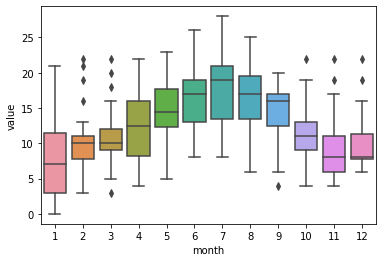

In [20]:
sns.boxplot(data= new_temp_df, x ='month' , y='value')

### Exerise 3
Exercise 2는 자료가 없으므로 패스

In [21]:
imdb_df = pd.read_csv('data/ch11/imdb_top_1000.csv')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [22]:
sorted_imdb_df = imdb_df[['IMDB_Rating','Certificate','Runtime','Genre','Gross']] ## Certificate, Gross missing value

sorted_imdb_df.head(5)

,IMDB_Rating,Certificate,Runtime,Genre,Gross
0,9.3,A,142 min,Drama,"28,341,469"
1,9.2,A,175 min,"Crime, Drama","134,966,411"
2,9.0,UA,152 min,"Action, Crime, Drama","534,858,444"
3,9.0,A,202 min,"Crime, Drama","57,300,000"
4,9.0,U,96 min,"Crime, Drama","4,360,000"


In [23]:
x = sorted_imdb_df.Genre.str.split(',')
k=[]
for i in range(len(x)) : 
    k += x[i]
print(set(k))

{'Mystery', ' Crime', ' Sport', 'Crime', ' Action', 'Animation', ' Fantasy', ' Comedy', ' Horror', 'Biography', ' Musical', ' War', ' Adventure', ' Film-Noir', 'Adventure', 'Western', ' Music', ' Mystery', ' Drama', ' Romance', 'Film-Noir', 'Fantasy', ' Biography', 'Thriller', 'Family', ' Family', ' Sci-Fi', ' Western', 'Horror', 'Action', ' Thriller', 'Drama', 'Comedy', ' History'}


In [24]:
x = sorted_imdb_df.Genre.str.split(',')
a = []
for i in range(len(x)) :
    a.append(len(x[i]))

# sorted_imdb_df['Gen_len'] = a


In [25]:
new_imdb_df = sorted_imdb_df.dropna()


In [26]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import preprocessing


# predictors = new_imdb_df.drop(columns=['IMDB_Rating']).columns ### Nomalizing을 하지 않는다.
# target = 'IMDB_Rating'

# for val in predictors : 
#     xs = new_imdb_df[val]
#     print(xs)
#     le = preprocessing.LabelEncoder()
#     xs = le.fit_transform(xs)
# y = new_imdb_df[target]
# classtree = DecisionTreeClassifier()
# classtree.fit(xs,y)
# # predict_y = classtree.predict(newapplicant_df)
# # print(predict_y)

### Exercise 4

In [27]:
responses_df = pd.read_csv('data/ch11/responses.csv')
columns_df = pd.read_csv('data/ch11/columns.csv')

In [28]:
# responses_df.info()
columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   original  150 non-null    object
 1   short     150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [29]:
Q3 = responses_df.Age.quantile(0.75)
Q1 = responses_df.Age.quantile(0.25)
IQR = Q3-Q1
upper_cap = Q3 + 1.5*IQR
lower_cap = Q1 - 1.5*IQR

BM = responses_df.Age > upper_cap
responses_df.loc[responses_df[BM].index,'Age'] = upper_cap
BM = responses_df.Age < lower_cap
responses_df.loc[responses_df[BM].index,'Age'] = lower_cap




<AxesSubplot:ylabel='Age'>

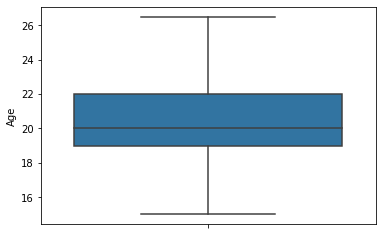

In [30]:
sns.boxplot(y= responses_df.Age)

<AxesSubplot:xlabel='Country', ylabel='Metal or Hardrock'>

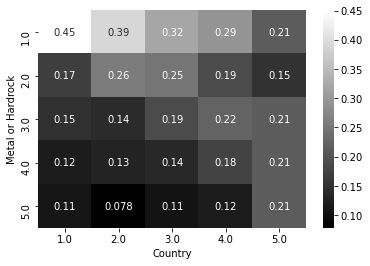

In [31]:
metal_country_df = responses_df[['Metal or Hardrock','Country']]
contingency_table = pd.crosstab(metal_country_df.iloc[:,0],metal_country_df.iloc[:,1])
possibility_tbl = contingency_table/contingency_table.sum()
sns.heatmap(possibility_tbl,annot=True, cmap='gray')

In [32]:
new_response_df = responses_df.loc[:,['Weight','Height','Education']]
new_response_df.dropna(inplace=True)

<AxesSubplot:>

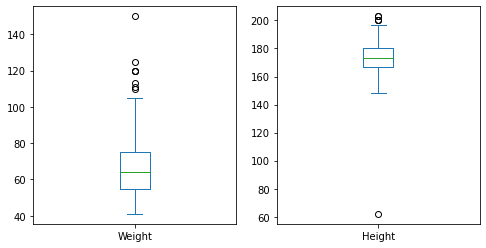

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
new_response_df['Weight'].plot.box()
plt.subplot(1,2,2)
new_response_df['Height'].plot.box()

In [34]:
new_response_df['BMI'] = responses_df['Weight'] / ((responses_df['Height']/100)**2)

new_response_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     979 non-null    float64
 1   Height     979 non-null    float64
 2   Education  979 non-null    object 
 3   BMI        979 non-null    float64
dtypes: float64(3), object(1)
memory usage: 38.2+ KB


In [35]:
new_response_df.drop(new_response_df[new_response_df['BMI'] > 120].index,axis=0,inplace=True)

<AxesSubplot:xlabel='BMI', ylabel='Education'>

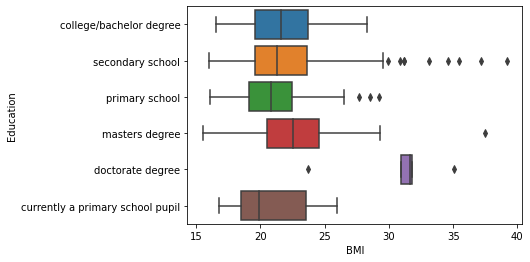

In [36]:
sns.boxplot(data=new_response_df, y='Education',x='BMI')

In [37]:
# BMI Outlier 없애기

for degree in new_response_df['Education'].unique() :
# for degree in ['college/bachelor degree'] :
    print(degree)
    de = new_response_df['Education'] == degree
    k = new_response_df[de]
    Q3 = k.BMI.quantile(0.75)
    Q1 = k.BMI.quantile(0.25)
    IQR = Q3-Q1
    upper_cap = Q3 + 1.5*IQR
    lower_cap = Q1 - 1.5*IQR

    BM = k.BMI > upper_cap
    # print(BM)
    # print(len(k[BM].index))
    new_response_df.loc[k[BM].index,'BMI'] = upper_cap
    BM = k.BMI < lower_cap
    new_response_df.loc[k[BM].index,'BMI'] = lower_cap

college/bachelor degree
secondary school
primary school
masters degree
doctorate degree
currently a primary school pupil


<AxesSubplot:xlabel='BMI', ylabel='Education'>

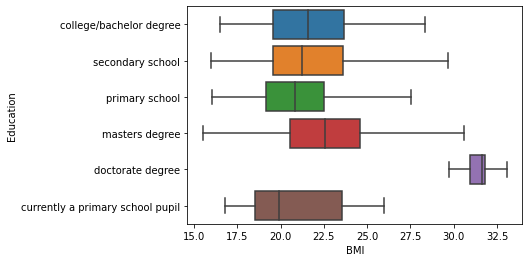

In [38]:
sns.boxplot(data=new_response_df, y='Education',x='BMI')

<AxesSubplot:xlabel='BMI', ylabel='age'>

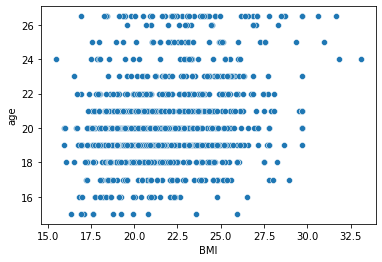

In [39]:
### age 불러오기 쉬움. BM 이용하면 됨
BM = new_response_df['BMI'].index 
new_response_df['age']= responses_df['Age'][BM]

sns.scatterplot(x='BMI', y='age',data=new_response_df)

In [40]:
BM = new_response_df['BMI'].index 
new_response_df['Gender']= responses_df['Gender'][BM]
new_response_df.dropna(inplace=True)

In [41]:
x =[]
for poss in new_response_df['Gender'].unique() :
    BM = new_response_df['Gender'] == poss
    x.append(new_response_df[BM].BMI.values)

<AxesSubplot:xlabel='BMI', ylabel='Gender'>

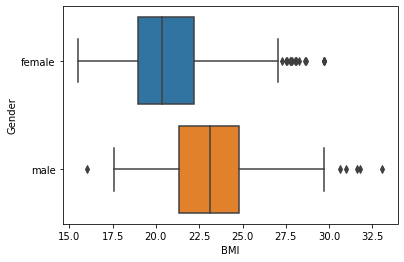

In [42]:
sns.boxplot(data = new_response_df[['BMI','Gender']], x = 'BMI', y= 'Gender')

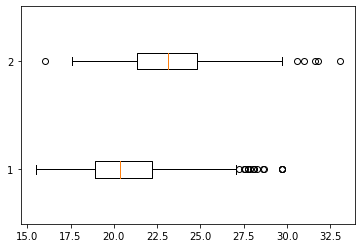

In [43]:
resposne_se = pd.Series(x)
plt.boxplot(resposne_se, vert=False)
plt.show()

### Exercise 6
* exercise 5는 자료가 없으므로 생략

In [44]:
wh_report = pd.read_csv('data/ch11/WH Report.csv')
wh_report.head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258


In [45]:
wh_report.columns =['country','year','ladder','log_gdp','social_suppoet','expectancy','freedom_life','generosity','corruption','pos_aff','neg_aff']

In [46]:
for col in wh_report.columns :
    print('{} : {}'.format(col,sum(wh_report[col].isna())))

country : 0
year : 0
ladder : 0
log_gdp : 36
social_suppoet : 13
expectancy : 55
freedom_life : 32
generosity : 89
corruption : 110
pos_aff : 22
neg_aff : 16


In [47]:
wh_report.dropna(inplace=True)

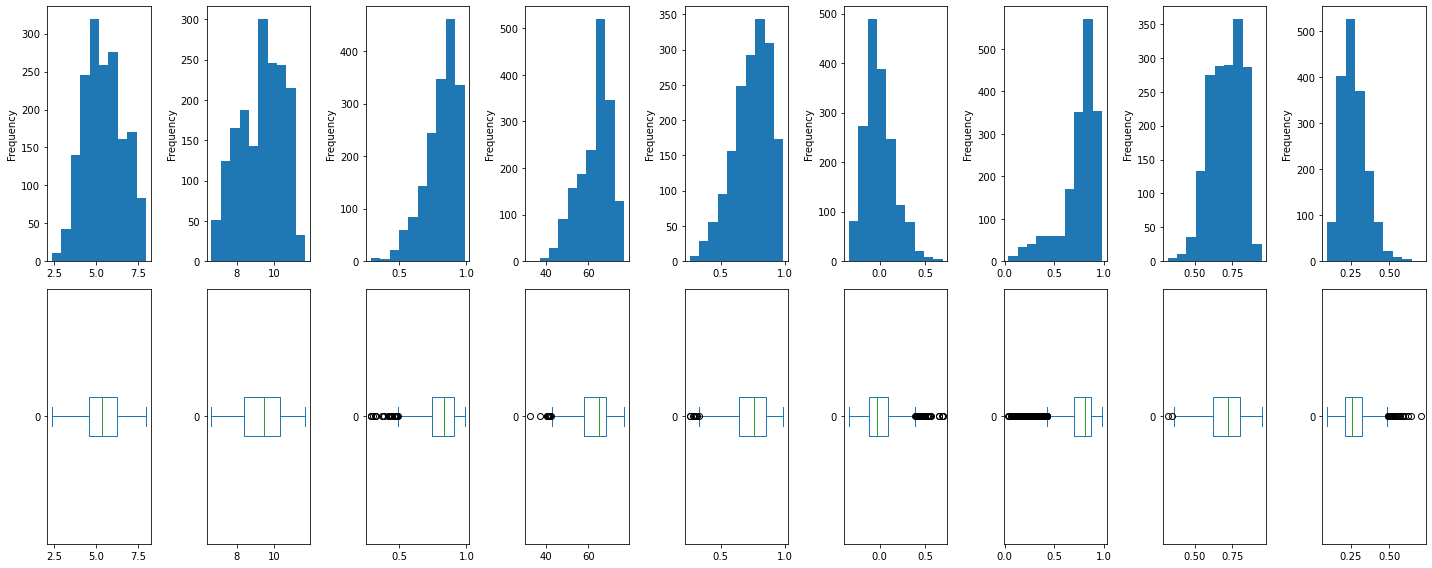

In [48]:
outlier_check = wh_report.drop(columns=['country','year']).columns
total_len = len(outlier_check)

plt.figure(figsize=(20,8))

for i, col in enumerate(outlier_check) :
    plt.subplot(2,total_len,i+1)
    # sns.histplot(x=wh_report[col])
    # plt.hist(wh_report[col])
    wh_report[col].plot.hist()

    plt.subplot(2,total_len,i+1+total_len)
    # plt.boxplot(wh_report[col],vert=False)
    # sns.boxplot(x=wh_report[col])
    wh_report[col].plot.box(vert=False, use_index=False)

plt.tight_layout()
plt.show()